# Quality of analysis

# Introduction

This data for a group of patients contain variables such as Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship , Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show 
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? 
from this data we explore why dosn't pepole no-show? 

# what is the question which i will answer it?

#####How many people is no-show in both gander?
#####What are the ages of no-shows?
#####What are the most days when people is no-show?
#####What is the percentage of women and men who had scholarships and did no-show?
#####What percentage of women and men drink alcohol and have grants and are no-show?
#####What percentage of men and women who have scholarships, drink alcohol, have a disability, and have no-show?
#####How many disabled people did no-show?

# Wranglenig Data

In [93]:
#import pandas library
import pandas as pd
#to quick data analysis and show most analytic which i want 
import pandas_profiling as pdp
#import library which draws digram
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
# read the file which contaune data by pandas library
df = pd.read_csv("/home/eslam/Downloads/KaggleV2-May-2016.csv")

# Assesing data

see data and find mistake after this i clean this mistake

In [3]:

df.profile_report(title= "quick analysis")

from quick analysis report, i can remove PatientId and AppointmentID and have one patient have -1 age 

In [3]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


from this informtion, display ScheduledDay and AppointmentDay data type is object so i will convern it to date time's type

In [6]:
y = lambda a,b : df.groupby([df[a],df[b]], as_index=False).size()

In [7]:
y("Gender","No-show")

,Gender,No-show,size
0,F,No,57246
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


In [163]:
counts =lambda a: df[a].value_counts()
counts("Age")

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [9]:
#to sort value in Age's columns 
df["Age"].sort_values()

99832      -1
34218       0
102834      0
102832      0
102830      0
         ... 
63915     115
76284     115
68127     115
63912     115
97666     115
Name: Age, Length: 110527, dtype: int64

In [10]:
#show more information about Age 
df["Age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [11]:
#this code to know number which show
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

we can see numbers' patient which show is 22319  which  percentage equal 20.1% this class which i will foucs it. 

In [164]:
counts("Scholarship")

0    99666
1    10861
Name: Scholarship, dtype: int64

In [13]:
#i want, How many pepole has scholarship and now show?
y("No-show","Scholarship")

,No-show,Scholarship,size
0,No,0,79925
1,No,1,8283
2,Yes,0,19741
3,Yes,1,2578


from this table, people has scolarship and no show is smallest and a percentage is 2.3% from all

In [165]:
counts("Diabetes")

0    102584
1      7943
Name: Diabetes, dtype: int64

In [15]:
y("No-show","Diabetes")

,No-show,Diabetes,size
0,No,0,81695
1,No,1,6513
2,Yes,0,20889
3,Yes,1,1430


In [16]:
df["Alcoholism"].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [17]:
y("No-show","Alcoholism")

,No-show,Alcoholism,size
0,No,0,85525
1,No,1,2683
2,Yes,0,21642
3,Yes,1,677


In [18]:
df["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
y("No-show","Handcap")

,No-show,Handcap,size
0,No,0,86374
1,No,1,1676
2,No,2,146
3,No,3,10
4,No,4,2
5,Yes,0,21912
6,Yes,1,366
7,Yes,2,37
8,Yes,3,3
9,Yes,4,1


In [20]:
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [21]:
y("No-show","SMS_received")

,No-show,SMS_received,size
0,No,0,62510
1,No,1,25698
2,Yes,0,12535
3,Yes,1,9784


In [22]:
df["Hipertension"].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [23]:
y("No-show","Hipertension")

,No-show,Hipertension,size
0,No,0,70179
1,No,1,18029
2,Yes,0,18547
3,Yes,1,3772


In [24]:
df["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [25]:
y("No-show","Neighbourhood")

,No-show,Neighbourhood,size
0,No,AEROPORTO,7
1,No,ANDORINHAS,1741
2,No,ANTÔNIO HONÓRIO,221
3,No,ARIOVALDO FAVALESSA,220
4,No,BARRO VERMELHO,332
...,...,...,...
155,Yes,SÃO JOSÉ,428
156,Yes,SÃO PEDRO,515
157,Yes,TABUAZEIRO,573
158,Yes,UNIVERSITÁRIO,32


i will see How many mistake name in neighbouthood

In [26]:
df["Neighbourhood"].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

# cleaning the data

In [94]:
# i will make copy from data to work with it in cleanin
df_new = df.copy()

In [95]:
df_new[["date","time"]]=df_new["ScheduledDay"].str.split("T",expand=True)

i speration the date from scheduledDay to use in analysis such as display more month which more no show

In [29]:
df_new.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z


In [96]:
#i will convert ScheduledDay's type "object" to date time 
df_new["ScheduledDay"]=pd.to_datetime(df_new["ScheduledDay"])

In [97]:
#i will convert AppointmentDay's type "object" to date time 
df_new["AppointmentDay"]=pd.to_datetime(df_new["AppointmentDay"])

In [98]:
df_new["date"]=pd.to_datetime(df_new["date"])

# Test

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

# code

In [99]:
# i want find a not real number in Age columns 
df_new.loc[df["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,2016-06-06,08:58:13Z


In [35]:
#drop age which equal -1
df_new.drop([df_new.index[99832]], axis =0,inplace= True)

# test

In [36]:
df_new.loc[df["Age"]==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time


# code

In [37]:
# i drop first columns "PatientId" and secound columns "AppointmentID"
df_new.drop(["PatientId" , "AppointmentID"] , axis=1 , inplace=True)

# Test

In [38]:
df_new.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z


# Exploration phase.

i want select the data which work on in new dataset

In [100]:
# i save the data which countain no show in new variable its name is dataset
dataset =  df_new.loc[df["No-show"]=="Yes"]

In [40]:
# i want display quick analysis
dataset.profile_report(title="quick analysis after filtrate")

most Patient is female ==> 65.4%

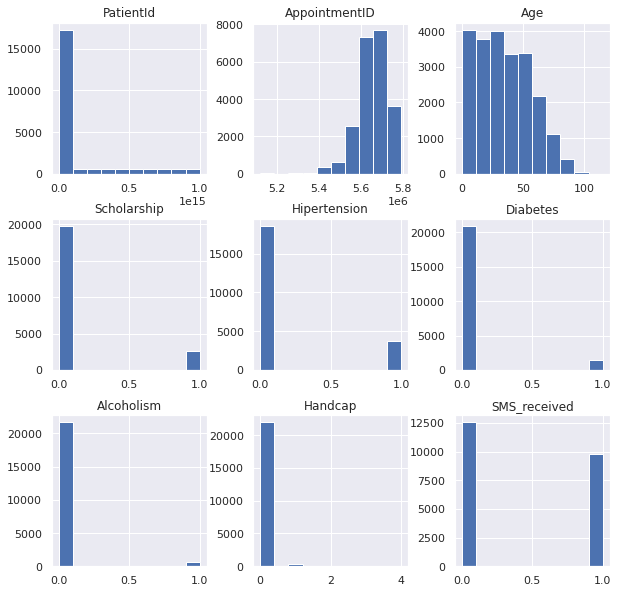

In [101]:
p = dataset.hist(figsize = (10,10))

i find the older who more show 

In [42]:
dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date,time
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:05:12Z
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04-27,15:39:58Z
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2016-04-26,08:44:12Z
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,2016-04-28,09:28:57Z
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2016-04-27,07:51:14Z


In [166]:
dataset.date.value_counts()

2016-05-03    893
2016-04-26    815
2016-05-02    799
2016-04-29    792
2016-04-28    774
             ... 
2016-01-21      1
2016-05-14      1
2016-02-03      1
2016-01-20      1
2016-02-04      1
Name: date, Length: 94, dtype: int64

a lot of pople no show some day such as 2016_05_03 
I wondered why people were absent that day

In [107]:
#i want know where is most day which pepole no_show
grap1=dataset.groupby(['Gender',"date"], as_index=False).size()

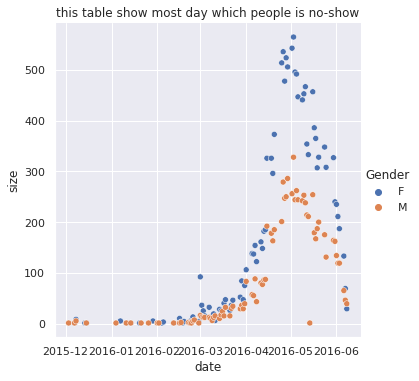

In [200]:
sns.relplot(x="date", y="size", hue="Gender",data=grap1).set(title="this table show most day which people is no-show");

The above graph, shows us, most people who no show focus in one zone which is 4-2016 and 6-2016

# I want know, did sent sms?

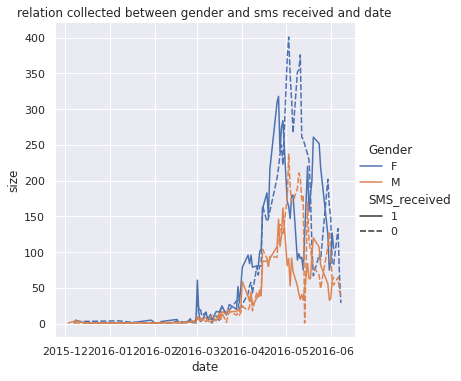

In [201]:
#i want to know more about gender, date, and SMS received so I make a new table to collect all in one table 
grap2=dataset.groupby(['Gender',"date","SMS_received"], as_index=False).size()
#i will convert sms received to object because i can make graph
grap2["SMS_received"] =grap2["SMS_received"].astype(str)
sns.relplot(x="date", y="size", hue="Gender", style="SMS_received",
            kind="line", data=grap2).set(title="relation collected between gender and sms received and date");

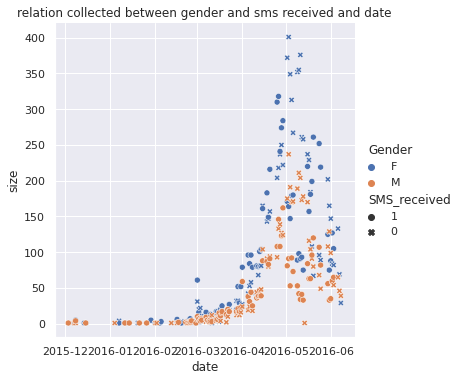

In [202]:
sns.relplot(x="date", y="size", hue="Gender", style="SMS_received", data=grap2).set(title="relation collected between gender and sms received and date");

this two graph, show us most people didn't receive sms so no show

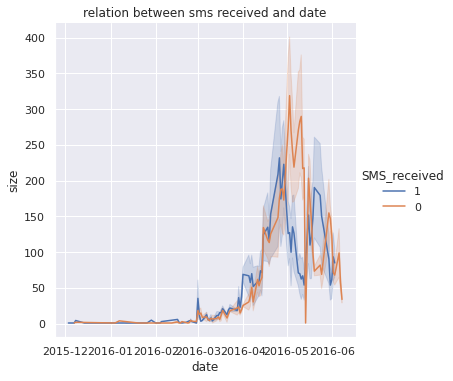

In [217]:
sns.relplot(x="date", y="size", hue="SMS_received", kind="line", data=grap2).set(title="relation between sms received and date");

This graph shows that the zone with the most NO-SHOW is the zone with the least messaging is recived sms

In [209]:
# i select all people which sms received in one taple  to know, did all patiant show
sms_received= df_new.loc[df_new["SMS_received"]==1]

In [210]:
sms_received["No-show"].value_counts()

No     25698
Yes     9784
Name: No-show, dtype: int64

i will make graph to show us what is time people which reveiced sms no show

In [211]:
sms_received=sms_received.groupby(['No-show',"date"], as_index=False).size()

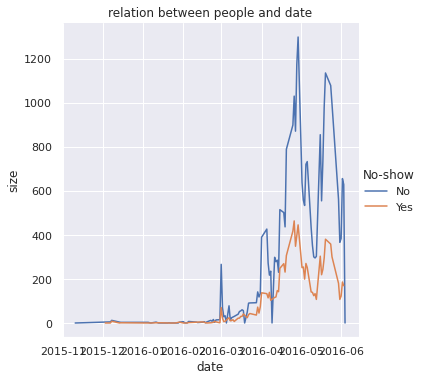

In [212]:
#i will make graph to show us what is time people which reveiced sms no show
sns.relplot(x="date", y="size", hue="No-show", kind="line", data=sms_received).set(title="relation between people and date");

In [213]:
sms_received.loc[sms_received["No-show"]=="Yes"]

,No-show,date,size
98,Yes,2015-12-03,1
99,Yes,2015-12-07,1
100,Yes,2015-12-08,9
101,Yes,2015-12-14,1
102,Yes,2015-12-15,2
...,...,...,...
179,Yes,2016-05-30,181
180,Yes,2016-05-31,108
181,Yes,2016-06-01,123
182,Yes,2016-06-02,187


all above graph foucs in sms_received 

In [187]:
sms_not_received=df_new.loc[df_new["SMS_received"]==0]

In [188]:
sms_not_received["No-show"].value_counts()

No     62510
Yes    12535
Name: No-show, dtype: int64

In [183]:
sms_not_received=sms_not_received.groupby(['No-show',"date"], as_index=False).size()

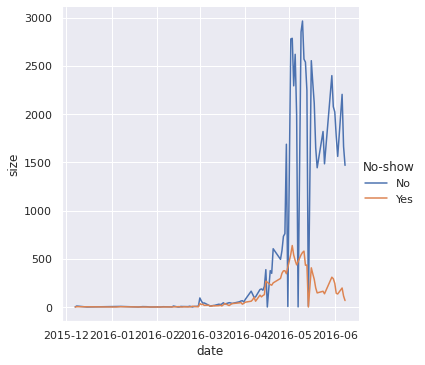

In [184]:
sns.relplot(x="date", y="size", hue="No-show", kind="line", data=sms_not_received);

from the this analysis show us,it is the presence of obstacles that prevent people from attending 

In [44]:
dataset.groupby(['No-show','Gender'], as_index=False).size()

,No-show,Gender,size
0,Yes,F,14594
1,Yes,M,7725


In [45]:
#which are gender more no-show?
dataset["Gender"].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

Text(0.5, 1.0, "gender's people is no show ")

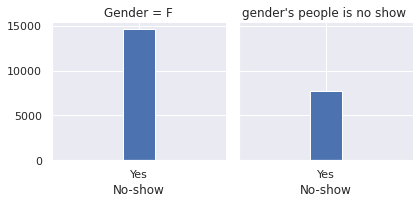

In [214]:
gender = sns.FacetGrid(dataset, col='Gender')
gender.map(plt.hist, 'No-show', bins=5)
plt.title("gender's people is no show ")

when we see this diagram, we feel number's female  more than number's men but this doesn't correct because number's women in general biggest so We must analyze the data for women in relation to women to display the correct statistic .

from this analysis we can explore which are gender more no show, the answer to this question is 
the male is 19.9% which no show
and female 20.23% which no show
here we use presented because the female's number is biggest so if I use the number to Comparison is fair and  to display correct statistic Why did I use a percentage, because the numbers of women are greater than men? If I do not use the percentage, the numbers will deceive me and do not appear as they are, and women will be the largest group, and this will happen because of the large numbers of women

20.23% from female no show that mean each 2 from 10 female no show
19.9 % from men no show that mean each 2 from 10 men no show

In [215]:
# this code to know, how many female and male have scholarship and no show
grap=dataset.groupby(['Gender',"Scholarship"], as_index=False).size()

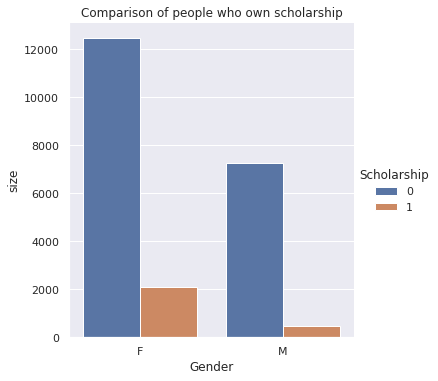

In [216]:
sns.catplot(x="Gender", y="size", hue="Scholarship", kind="bar", data=grap).set(title="Comparison of people who own scholarship")

from this analysis when calulcate a percentage we find 14.4% from female no show and 6% from men no show

In [48]:
dataset.groupby(['Alcoholism',"Scholarship","Gender"], as_index=False).size()

,Alcoholism,Scholarship,Gender,size
0,0,0,F,12310
1,0,0,M,6903
2,0,1,F,1976
3,0,1,M,453
4,1,0,F,178
5,1,0,M,350
6,1,1,F,130
7,1,1,M,19


In [49]:
#this line code to know all numbers not only number's no _show to compare with above line to extract a percentage 
df.groupby(['Alcoholism',"Scholarship","Gender"], as_index=False).size()

,Alcoholism,Scholarship,Gender,size
0,0,0,F,62201
1,0,0,M,34633
2,0,1,F,8416
3,0,1,M,1917
4,1,0,F,786
5,1,0,M,2046
6,1,1,F,437
7,1,1,M,91


from this analysis i find, female be Alcoholism, Scholarship who no_show a percentage equal 29.7% and men be Alcoholism, Scholarship who no_show a percentage equal 20.87%

In [50]:
df.groupby(['Alcoholism',"Scholarship","SMS_received","Gender"], as_index=False).size()

,Alcoholism,Scholarship,SMS_received,Gender,size
0,0,0,0,F,41197
1,0,0,0,M,24382
2,0,0,1,F,21004
3,0,0,1,M,10251
4,0,1,0,F,5567
5,0,1,0,M,1386
6,0,1,1,F,2849
7,0,1,1,M,531
8,1,0,0,F,545
9,1,0,0,M,1565


In [51]:
dataset.groupby(['Alcoholism',"Scholarship","SMS_received","Gender"], as_index=False).size()

,Alcoholism,Scholarship,SMS_received,Gender,size
0,0,0,0,F,6684
1,0,0,0,M,4145
2,0,0,1,F,5626
3,0,0,1,M,2758
4,0,1,0,F,1019
5,0,1,0,M,287
6,0,1,1,F,957
7,0,1,1,M,166
8,1,0,0,F,95
9,1,0,0,M,217


from this analysis i find, female be Alcoholism, Scholarship, SMS_received  who no_show a percentage equal 50% and men be Alcoholism, Scholarship, SMS_received who no_show a percentage equal 41%

In [70]:
df.groupby(['Alcoholism',"Scholarship","Handcap","Gender"], as_index=False).size()

,Alcoholism,Scholarship,Handcap,Gender,size
0,0,0,0,F,61064
1,0,0,0,M,33781
2,0,0,1,F,1041
3,0,0,1,M,775
4,0,0,2,F,92
5,0,0,2,M,68
6,0,0,3,F,3
7,0,0,3,M,7
8,0,0,4,F,1
9,0,0,4,M,2


In [53]:
 dataset.groupby(['Alcoholism',"Scholarship","Handcap","Gender"], as_index=False).size()

,Alcoholism,Scholarship,Handcap,Gender,size
0,0,0,0,F,12095
1,0,0,0,M,6749
2,0,0,1,F,189
3,0,0,1,M,142
4,0,0,2,F,25
5,0,0,2,M,9
6,0,0,3,M,3
7,0,0,4,F,1
8,0,1,0,F,1952
9,0,1,0,M,449


no one be Alcoholism, Scholarship, and Handcap who no_show

In [54]:
dataset["Scholarship"].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

we can find from analysis colunm scholarship 
most pepole have scolarship no show
sholarship is 23.73% no show
while no sholarship is 19.81% no show

In [55]:
dataset["Hipertension"].value_counts()

0    18547
1     3772
Name: Hipertension, dtype: int64

In [56]:
dataset.groupby(['No-show','Hipertension'], as_index=False).size()

,No-show,Hipertension,size
0,Yes,0,18547
1,Yes,1,3772


Patient who be hipetension and no show a percentage is 17.3% from all patient who be hipertension, and patient who doesn't be hipertension and show a percentage is 20.9% from all patient who doesn't be hipertension, this statistic will show if i use usually number. Patient who be hipetension and no show a percentage is 3.4% from all patient and patient who doesn't be  hipetension and no show is a percentage16.78% from all patient.

In [59]:
dataset["Diabetes"].value_counts()


0    20889
1     1430
Name: Diabetes, dtype: int64

In [58]:
dataset.groupby(['No-show','Diabetes'], as_index=False).size()

,No-show,Diabetes,size
0,Yes,0,20889
1,Yes,1,1430


Patient who be Diabetes and no show a percentage is 18.0% from all patient who be Diabetes, and patient who doesn't be Diabetes and show a percentage is 20.36% from all patient who doesn't be Diabetes, but  Patient who be Diabetes and no show a percentage is 1.29% from all patient and patient who doesn't be  Diabetes and no show is18.8% a percentage from all patient.

In [60]:
dataset["Alcoholism"].value_counts()

0    21642
1      677
Name: Alcoholism, dtype: int64

In [61]:
dataset.groupby(['No-show','Alcoholism'], as_index=False).size()

,No-show,Alcoholism,size
0,Yes,0,21642
1,Yes,1,677


Patient who be Alcoholism and no show a percentage is 20.148%  from all patient who be Alcoholism, and patient who doesn't be Alcoholism and show a percentage is 20.19% from all patient who doesn't be Alcoholism, but  Patient who be Alcoholism and no show a percentage is .61% from all patient and patient who doesn't be  Alcoholism and no show is 19.58% a percentage from all patient.

In [62]:
dataset["Handcap"].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: Handcap, dtype: int64

In [63]:
dataset.groupby(['No-show','Handcap'], as_index=False).size()

,No-show,Handcap,size
0,Yes,0,21912
1,Yes,1,366
2,Yes,2,37
3,Yes,3,3
4,Yes,4,1


Patient who be Handcap and no show a percentage is 17.923%  from all patient who be Handcap, and patient who doesn't be Handcap and show a percentage is 20.23% from all patient who doesn't be Handcap, but  Patient who be Handcap and no show a percentage is .33% from all patient and patient who doesn't be  Handcap and no show is 21.912% a percentage from all patient.

In [64]:
dataset["SMS_received"].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

In [167]:
dataset.groupby(['No-show','SMS_received'], as_index=False).size()

,No-show,SMS_received,size
0,Yes,0,12535
1,Yes,1,9784


Patient who be SMS_received and no show a percentage is 27.57%  from all patient who be SMS_received, and patient who doesn't be SMS_received and show a percentage is 16.7% from all patient who doesn't be SMS_received, but  Patient who be SMS_received and no show a percentage is 8.85% from all patient and patient who doesn't be  SMS_received and no show is 11.3 % a percentage from all patient.

# conclusuions phase

now I can answer the question  and give note from exploration data analysis 
first question, Who to blame?
the answer is the doctor, why? I will explain to you 
As we explore the data, you'll notice that many of the no-shows are concentrated in one area. I noticed that this area a lot of change because of the fluctuation of call achievement. on days when there is a lot of sending messages then there is a large number of patient, and vice versa, sending messages made the patient reassured that there was someone to make him remember the session, but sometimes there was not sending SMS to a patient, so a large number did not attend the appointment. there are certainly other reasons for not attending, but this was the most common.